In [40]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# analyzing columns

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()

3623

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
# analyz all the unique value in each tables
for column in df.columns:
    print(column,':',df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Analyzing Gender

In [15]:
len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])

(405380, 132197)

In [16]:
Data = pd.DataFrame({'ratio': [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]}, index= ['Male','Female'])

In [17]:
Data

,ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='ratio'>

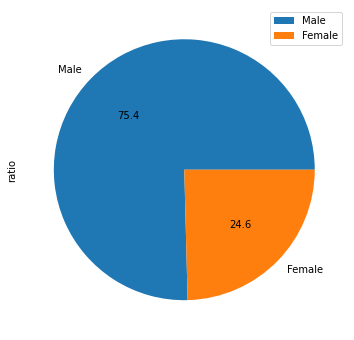

In [18]:
Data.plot.pie(y='ratio',figsize= (6,6), autopct='%.1f')

<AxesSubplot:title={'center':'Gender Ratio'}, xlabel='Gender'>

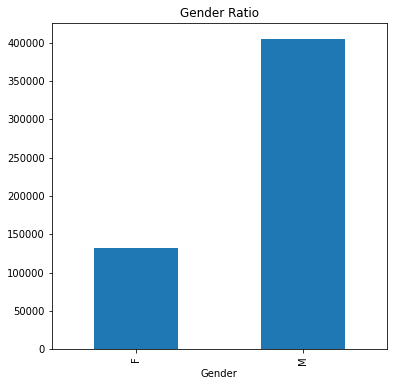

In [19]:
df.groupby('Gender').size().plot(kind='bar',
                                 figsize=(6,6),
                                 title ='Gender Ratio'
                                 )

In [20]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

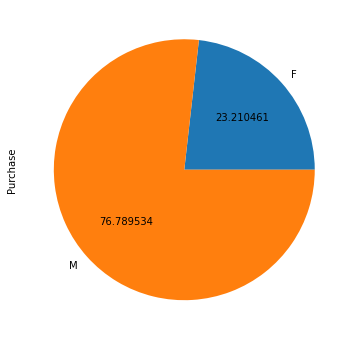

In [21]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',
                                           figsize=(6,6),
                                           autopct='%1f')

<AxesSubplot:ylabel='Purchase'>

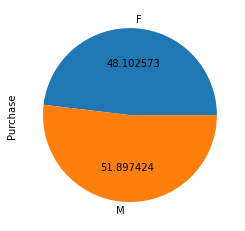

In [22]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',
                                            autopct="%1f")

# Analyzing Age & marital status

<AxesSubplot:title={'center':'purchase distribution by age'}, xlabel='Age'>

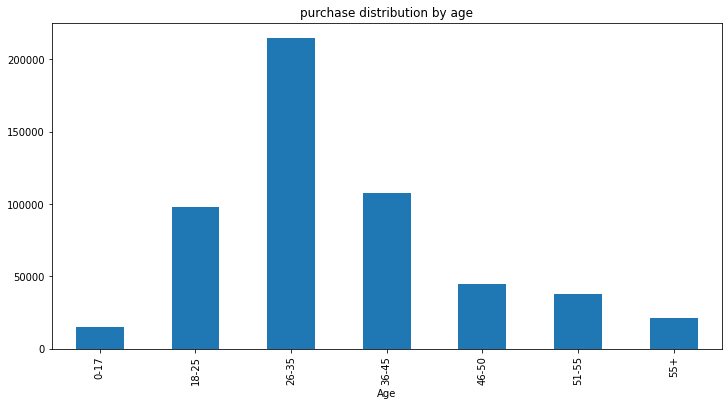

In [23]:
df.groupby('Age').size().plot(kind='bar',
                             figsize=(12,6),
                             title='purchase distribution by age')

In [24]:
lst= []
for i in df['Age'].unique():
    lst.append([i, len(df[df['Age']==i]['Product_ID'].unique())])

In [25]:
lst

[['0-17', 2300],
 ['55+', 2573],
 ['26-35', 3419],
 ['46-50', 3099],
 ['51-55', 2877],
 ['36-45', 3318],
 ['18-25', 3213]]

In [26]:
data = pd.DataFrame(lst, columns = ['Age','Product'])

<AxesSubplot:xlabel='Age'>

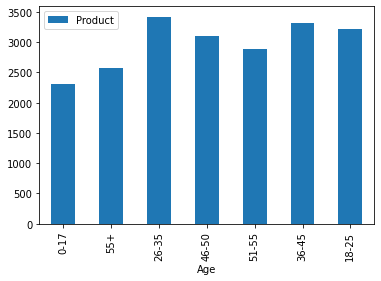

In [27]:
data.plot.bar( x ='Age')

<AxesSubplot:title={'center':'Amount spend by Age'}, xlabel='Age'>

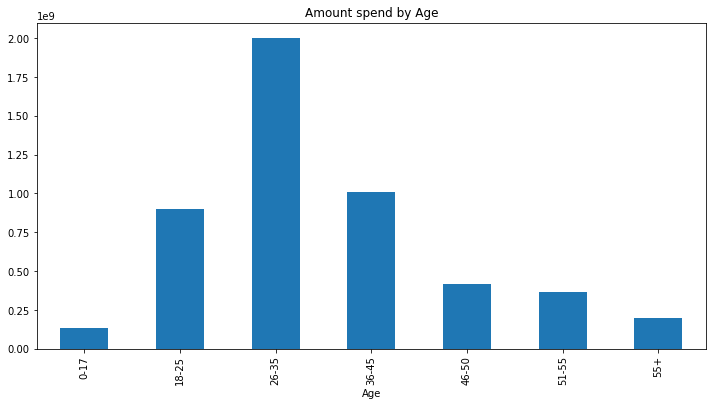

In [28]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',
                             figsize=(12,6),
                             title='Amount spend by Age')

<AxesSubplot:title={'center':'Amount spend by Age'}, xlabel='Age'>

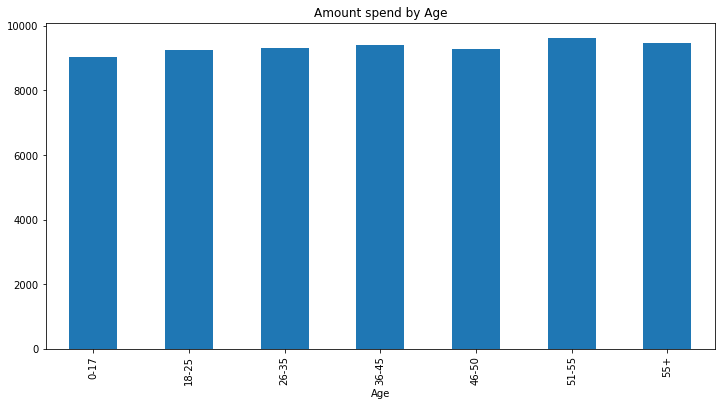

In [29]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar',
                             figsize=(12,6),
                             title='Amount spend by Age')

<AxesSubplot:ylabel='None'>

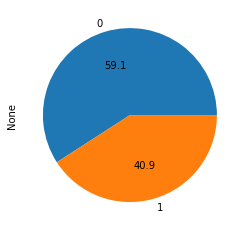

In [34]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct = '%0.1f' )

<AxesSubplot:ylabel='None'>

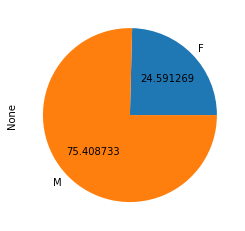

In [44]:
df.groupby('Gender').size().plot(kind='pie', autopct = '%1f')

# multi column analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

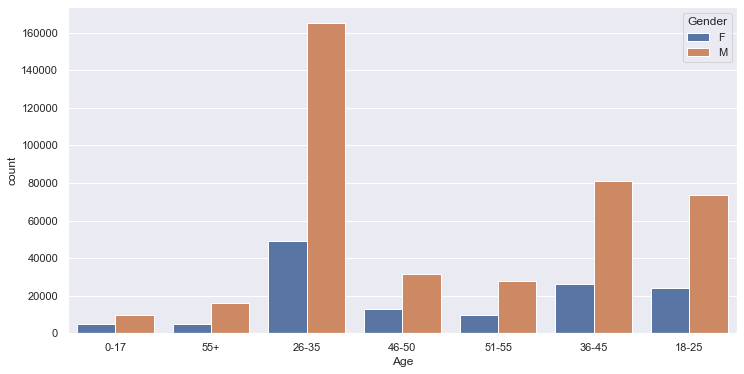

In [45]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x='Age',hue='Gender',data= df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

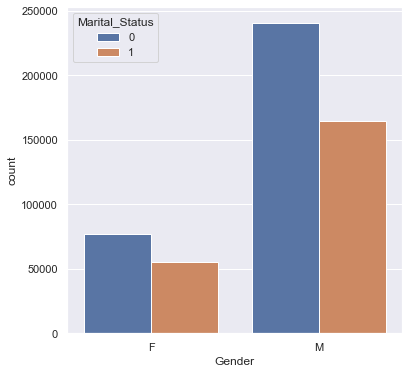

In [46]:
sns.set( rc= {'figure.figsize': (6,6)})
sns.countplot(x = 'Gender', hue= 'Marital_Status', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

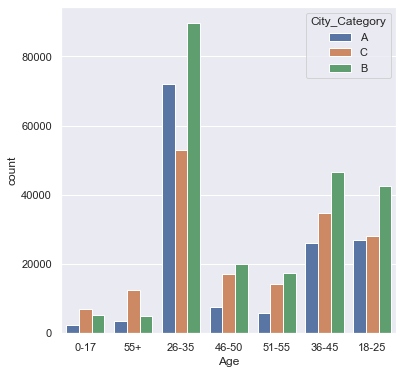

In [49]:
sns.countplot(x = 'Age', hue='City_Category', data= df)

<AxesSubplot:ylabel='None'>

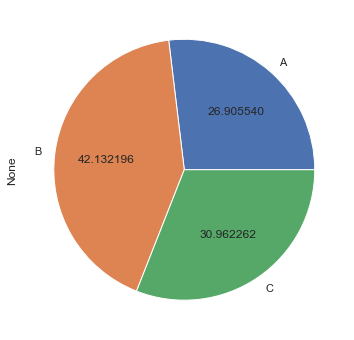

In [50]:
df.groupby('City_Category').size().plot(kind= 'pie',autopct= '%1f')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

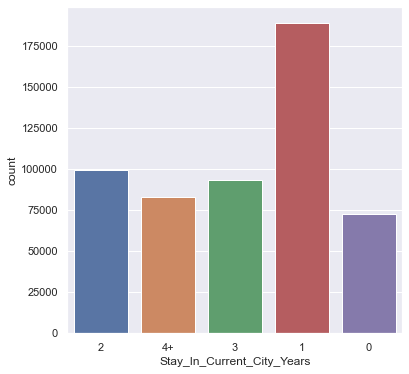

In [51]:
sns.countplot(x= df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

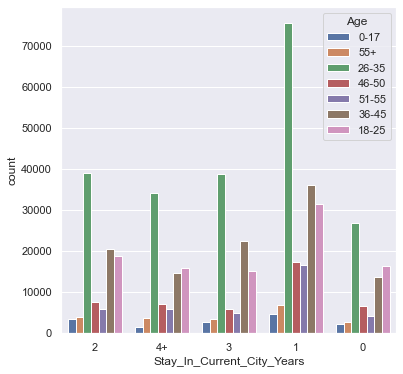

In [52]:
sns.countplot(x= 'Stay_In_Current_City_Years', hue = 'Age', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

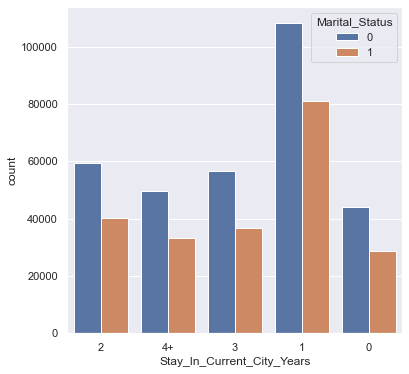

In [53]:
sns.countplot(x= 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

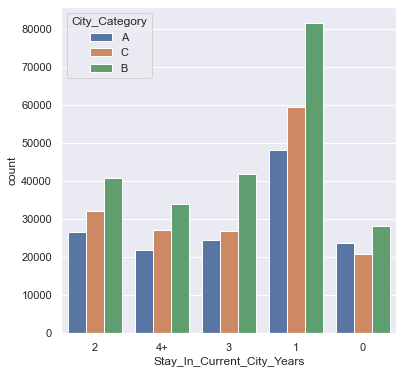

In [54]:
sns.countplot(x= 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='Occupation'>

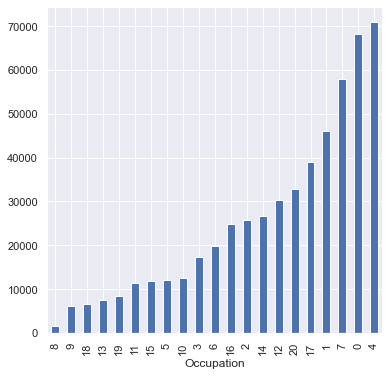

In [58]:
df.groupby('Occupation').size().sort_values().plot(kind= 'bar')

<AxesSubplot:xlabel='Occupation'>

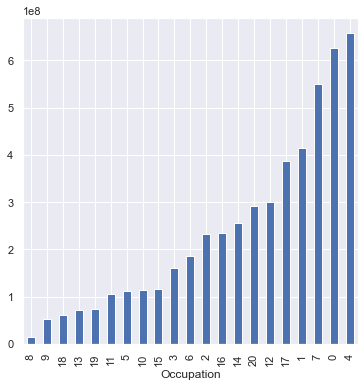

In [59]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind= 'bar')

<AxesSubplot:xlabel='Occupation'>

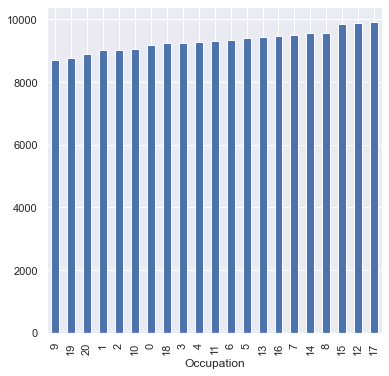

In [60]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind= 'bar')

<AxesSubplot:xlabel='Occupation'>

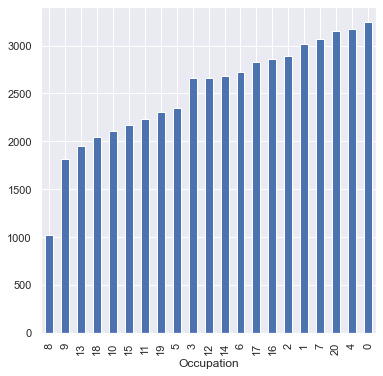

In [63]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

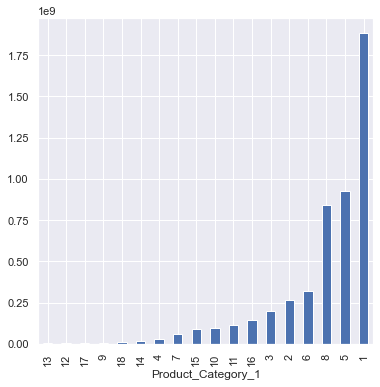

In [68]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

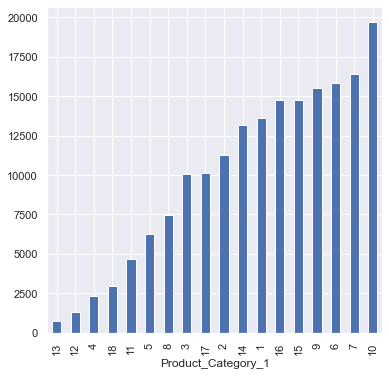

In [69]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<AxesSubplot:xlabel='Product_ID'>

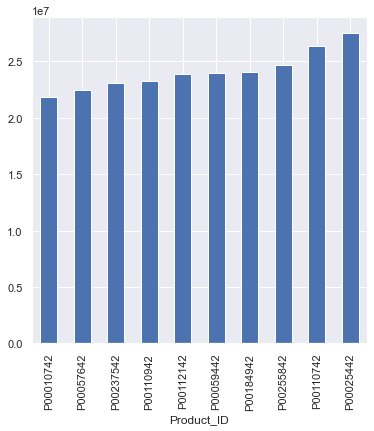

In [70]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

# Combining Age and Marital Status

In [79]:
l=[]
for i  in range(len(df)):
    l.append(df['Gender'][i] +'_'+ str(df['Marital_Status'][i]))


In [80]:
df['Maritalgender'] = l


In [81]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Maritalgender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='Maritalgender', ylabel='count'>

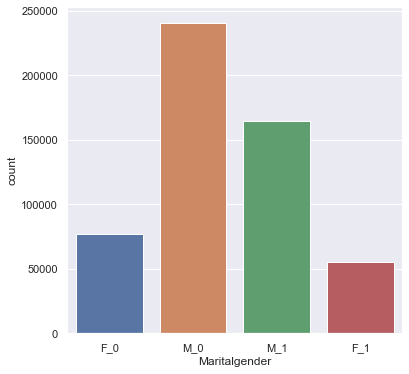

In [84]:
sns.countplot(x=df['Maritalgender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

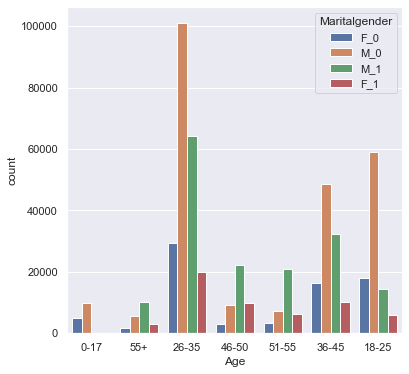

In [85]:
sns.countplot( x= 'Age' , hue='Maritalgender', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

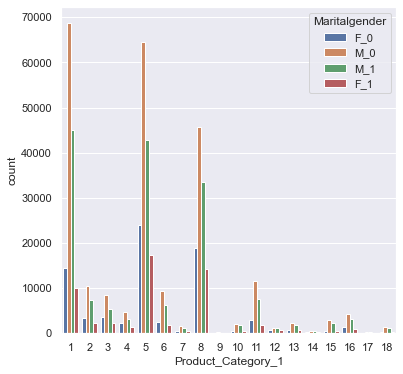

In [86]:
sns.countplot( x= 'Product_Category_1' , hue='Maritalgender', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

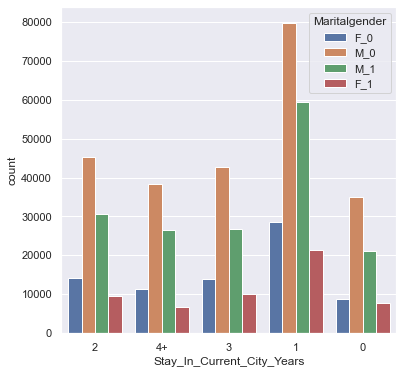

In [87]:
sns.countplot( x= 'Stay_In_Current_City_Years' , hue='Maritalgender', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

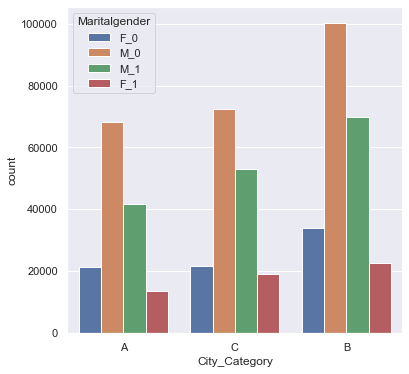

In [88]:
sns.countplot( x= 'City_Category' , hue='Maritalgender', data = df)